<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Fit-real-histogram" data-toc-modified-id="-Fit-real-histogram-1"><span class="toc-item-num">1&nbsp;&nbsp;</span> Fit real histogram</a></span><ul class="toc-item"><li><span><a href="#-Create-normally-distributed-data" data-toc-modified-id="-Create-normally-distributed-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span> Create normally distributed data</a></span></li><li><span><a href="#-Obtain-the-fitting-to-a-normal-distribution" data-toc-modified-id="-Obtain-the-fitting-to-a-normal-distribution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span> Obtain the fitting to a normal distribution</a></span></li><li><span><a href="#-Get-the-histogram-data-from-NumPy" data-toc-modified-id="-Get-the-histogram-data-from-NumPy-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span> Get the histogram data from NumPy</a></span></li><li><span><a href="#-Scale-the-normal-PDF-to-the-area-of-the-histogram" data-toc-modified-id="-Scale-the-normal-PDF-to-the-area-of-the-histogram-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span> Scale the normal PDF to the area of the histogram</a></span></li></ul></li></ul></div>

<H1> Fit real histogram</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import norm

<H2> Create normally distributed data</H2>

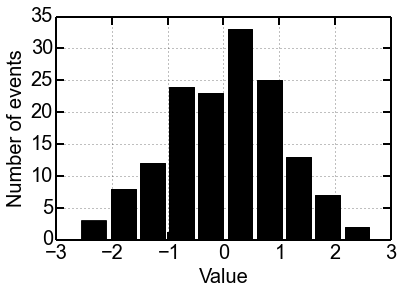

In [3]:
# fake some data
data = norm.rvs(loc=0.0, scale=1.0, size =150)
plt.hist(data, rwidth=0.85, facecolor='black');
plt.ylabel('Number of events');
plt.xlabel('Value');

<H2> Obtain the fitting to a normal distribution</H2>
<P> This is simply the mean and the standard deviation of the sample data<P>

In [4]:
mean, stdev = norm.fit(data)
print('Mean =%f, Stdev=%f'%(mean,stdev))

Mean =0.050569, Stdev=1.022829


To adapt the normalized PDF of the normal distribution we simply have to multiply every value by the area of the histogram obtained


<H2> Get the histogram data from NumPy</H2>

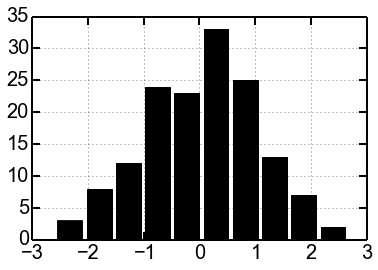

In [5]:
histdata = plt.hist(data, bins=10, color='black', rwidth=.85) # we set 10 bins

In [8]:
counts, binedge = np.histogram(data, bins=10);
print(binedge)

[-2.58148003 -2.0579089  -1.53433777 -1.01076664 -0.48719551  0.03637562
  0.55994674  1.08351787  1.607089    2.13066013  2.65423126]


In [9]:
#G et bincenters from bin edges
bincenter = [0.5 * (binedge[i] + binedge[i+1]) for i in xrange(len(binedge)-1)]

In [10]:
bincenter

[-2.3196944640956341,
 -1.7961233353834976,
 -1.272552206671361,
 -0.7489810779592242,
 -0.22540994924708757,
 0.29816117946504916,
 0.82173230817718612,
 1.3453034368893229,
 1.8688745656014594,
 2.3924456943135963]

In [11]:
binwidth = (max(bincenter) - min(bincenter)) / len(bincenter) 
print(binwidth)

0.471214015841


<H2> Scale the normal PDF to the area of the histogram</H2>

In [12]:
x = np.linspace( start = -4 , stop = 4, num = 100)
mynorm = norm(loc = mean, scale = stdev)

In [13]:
# Scale Norm PDF to the area (binwidth)*number of samples of the histogram
myfit = mynorm.pdf(x)*binwidth*len(data)

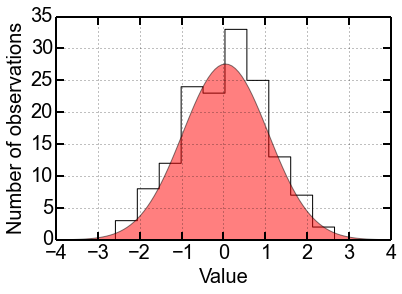

In [14]:
# Plot everthing together
plt.hist(data, bins=10, facecolor='white', histtype='stepfilled');
plt.fill(x, myfit, 'r', alpha=.5);
plt.ylabel('Number of observations');
plt.xlabel('Value');